Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from Smbit import Rehovot, RSL, load_rain_gauge
from inference_regression_classification import load_model, infer_entire_dataset_wtih_reference

Done
GPU not available, training on CPU.
cpu


Choose parameters

In [2]:
# Choose start and end date from '2020-11-01 01:10:00' to '2020-11-21 13:00:00'
date_start = '2020-11-04 05:00:00'
date_end = '2020-11-05 05:00:00'
# Choose hop from [1, 2, 3, 4, 29]
hop = 2
# Choose direction from 'up' or 'down'
dir = 'down'

Load RNN based model and the short links model

In [3]:
# Do not change the following parameters
link_name = f'{hop}_{dir}'
threshold = 0.7
dataset = 'validation'
SEQ_LENGTH = 48
SAVE = False
# Load pre trained model
model = load_model(model_name='RegressionTwoStep_rt-GRU_mt-skip_fz-large_sl-48_h-256_nl-2_d-0.5_wd-0.0001_e-200_train4.pt', threshold=threshold)
# Load short links model parameters
model_params_short_links = pd.read_pickle("ShortLinksModels/model_params_1down_train4.pkl")

Infer

Calculating attenuation
Computing rain


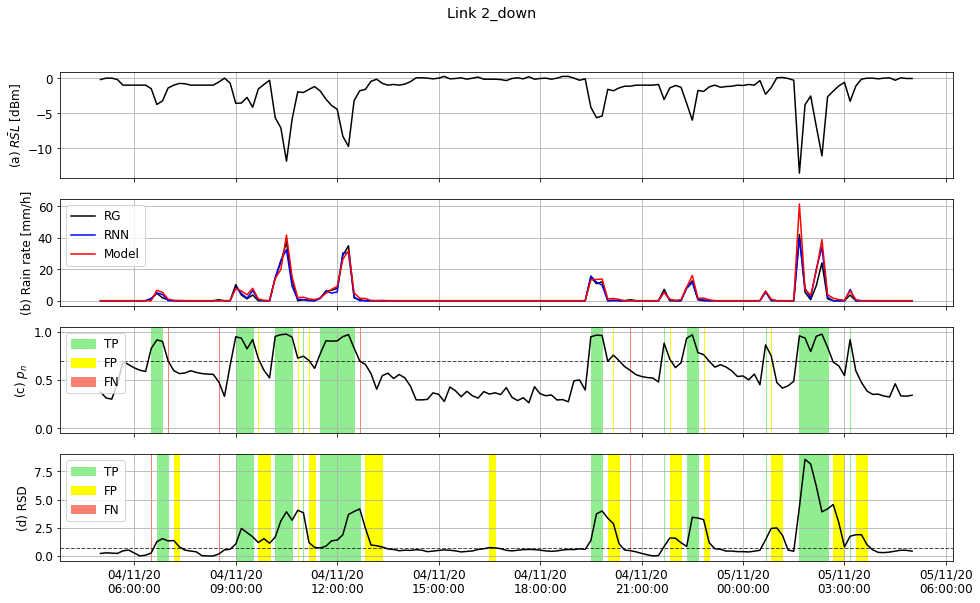

In [4]:
hops_to_keep_test = [hop]
hops_to_exclude_test = [i for i in range(1,  67) if i not in hops_to_keep_test]
rehovot_dataset = Rehovot(dataset='mini', seq_len=SEQ_LENGTH, hops_to_exclude=hops_to_exclude_test)

# For single links
link_index = np.argwhere(rehovot_dataset.dynamic_data.columns == link_name)[0, 0]
rsl_data = rehovot_dataset.dynamic_data[link_name]
meta_data = rehovot_dataset.static_data[link_index]
attenuation = rehovot_dataset.attenuation[link_name]
rolling_std = rehovot_dataset.rolling_std[link_name]
sigma_rsd = rehovot_dataset.sigma[link_name]
model_params_short_links = model_params_short_links[link_name]
rg_data = rehovot_dataset.rg
infer_entire_dataset_wtih_reference(model, rsl_data, threshold, attenuation, rolling_std, sigma_rsd, meta_data, model_params_short_links, rg_data, rehovot_dataset.valid_sequences, link_name, date_start, date_end, SAVE)

plt.show()